6.4 Machine Learning Part 1

This script contains the following:

1. Importing libraries and data

2. Data cleaning

3. Data prep for regression analysis

4. Regression analysis

Bonus: performance improvement after removing outliers


1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating Path
path = r'/Users/mac/Documents/Achievement 6_Project'

In [4]:
#Importing Suidcide Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

Extreme values checks

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='suicides_no', ylabel='Density'>

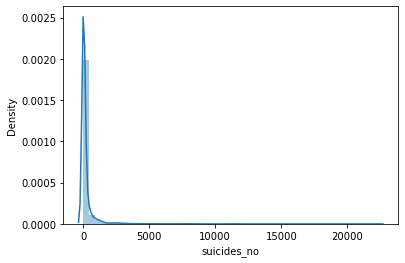

In [30]:
sns.distplot(df['suicides_no'], bins=50) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='suicides/100k pop', ylabel='Density'>

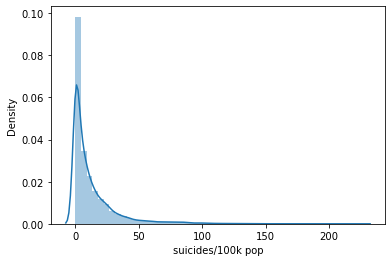

In [48]:
sns.distplot(df['suicides/100k pop'], bins=50) # Shows extreme values



3. Data prep for regression analysis

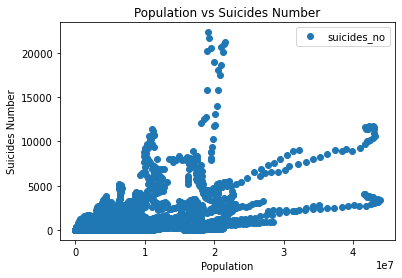

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Population vs suicides Number
df.plot(x = 'population', y='suicides_no',style='o')
plt.title('Population vs Suicides Number')  
plt.xlabel('Population')  
plt.ylabel('Suicides Number')  
plt.show()

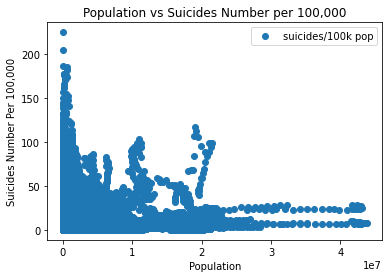

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
#2. Population vs Suicides/100k Population
df.plot(x = 'population', y='suicides/100k pop',style='o')
plt.title('Population vs Suicides Number per 100,000')  
plt.xlabel('Population')  
plt.ylabel('Suicides Number Per 100,000')  
plt.show()

Hypothesis: The higher the population, the higher the number of suicide

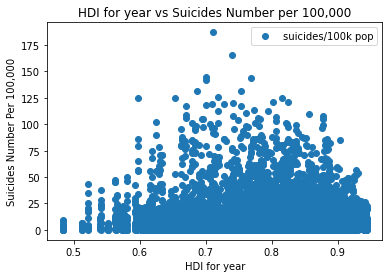

In [47]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
#2. Population vs Suicides/100k Population
df.plot(x = 'HDI for year', y='suicides/100k pop',style='o')
plt.title('HDI for year vs Suicides Number per 100,000')  
plt.xlabel('HDI for year')  
plt.ylabel('Suicides Number Per 100,000')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['population'].values.reshape(-1,1)
y = df['suicides_no'].values.reshape(-1,1)

In [32]:
X

array([[ 312900],
       [ 308000],
       [ 289700],
       ...,
       [2762158],
       [2631600],
       [1438935]])

In [33]:
y

array([[21],
       [16],
       [14],
       ...,
       [60],
       [44],
       [21]])

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Regression analysis

In [35]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

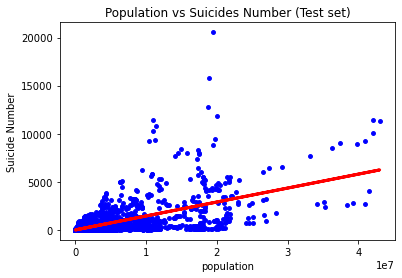

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population vs Suicides Number (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('Suicide Number')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  393893.4265665352
R2 score:  0.39899011403699614


The slope shows that as the population (X) rises, suicide stays thesame or slightly rises at a degree of 0.00014.
The mean squared error shows that theres a large average squared difference between estimated and true values thus a regression may not be the best model to predict the relationship between the two variables.
The R2 score of 0.398 shows that the model is a poor fit

In [41]:
y_predicted

array([[616.68881487],
       [ 24.16645299],
       [603.52666179],
       ...,
       [ 49.84746271],
       [-19.08884006],
       [ 10.00390713]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,453,616.688815
1,134,24.166453
2,38,603.526662
3,650,194.868097
4,1,-19.711652
5,16,36.781049
6,2,0.106178
7,721,215.054501
8,39,222.101415
9,2,51.341514


Comparing how the regression fits the training set

In [43]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014528]]
Mean squared error:  552506.6003376663
R2 score:  0.3731607805801328


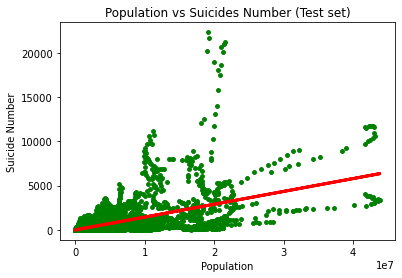

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs Suicides Number (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('Suicide Number')
plot_test.show()

13. The model failed to clearly explain the relationship between population and suicides number. The training data performed even worse than the test data set. Iteratively, the model was used to explain relationships between population and Suicide per 100,000 population, between HDI and suicide per 100000, between GDP per capita and suicides number (modifying both the dependent variable and the predictors) but the result showed that the model is not a fit. The fact that the data used for these predictions relate to people or their attributes means that there may be some sort of bias in the collection and documentation of the data. The assumption that suicide may represent a society or a sect in a bad manner may also lead to supression. Population figures may also tend to contain estimates. Removal of outliers may also translate to distorting realities.